In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.time import Time

def tde_decay(time, t0, coeff, const):
    return coeff * ((time-t0)**(-5/3)) + const

def pow_decay(time, idx, t0, coeff, const):
    return coeff * ((time - t0)**-idx) + const

In [2]:
times = ['2019-08-14T10:07:15','2019-08-18T02:58:07','2020-02-17T12:20:44','2024-08-06T18:54:43','2024-08-30T02:41:31','2024-08-30T06:48:31']
t = Time(times, format='isot', scale='utc')
print(t.mjd)


[58709.42170139 58713.12369213 58896.51439815 60528.78799769
 60552.11216435 60552.28369213]


In [3]:
fl = [3.74e-12,2.28e-12,1.12e-12,6.45e-13,5.98e-13,5.60e-13]
fle = [1.37e-13,2.76e-14,3.08e-14,1.24e-13,2.59e-14,2.03e-14]
flux = np.asarray(fl)
flux_err = np.asarray(fle)

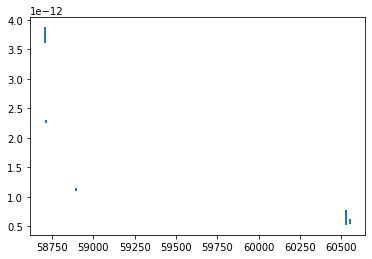

In [4]:
plt.errorbar(t.mjd, flux,flux_err,lw=0, elinewidth=2)
plt.show()

In [5]:
popt_tde, pcov_tde = curve_fit(tde_decay, t.mjd, flux, sigma=flux_err,maxfev=10000)
print(popt_tde)


[5.85292136e+04 1.06751040e-08 5.43749172e-13]


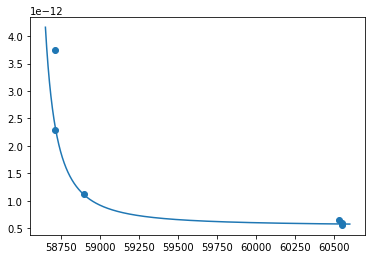

In [6]:
plt.scatter(t.mjd, flux)
plt.plot(np.arange(58650,60600), tde_decay(np.arange(58650,60600),*popt_tde))
plt.show()

In [7]:
start_pars = [5/3, 58600, 1e-8, 5.5e-13]
bnds = ([0.1,58500,0,0],[5,58708,np.inf,np.inf])
popt_pow, pcov_pow = curve_fit(pow_decay, t.mjd, flux, sigma=flux_err, maxfev=100000, p0=start_pars, bounds = bnds)
print(popt_pow)

[2.31898726e-01 5.87080000e+04 3.40969427e-12 1.38634853e-17]


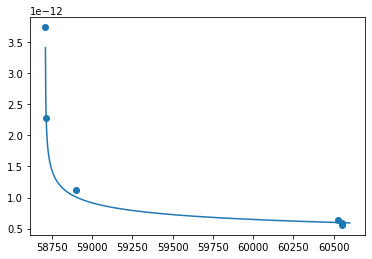

In [8]:
plt.scatter(t.mjd, flux)
plt.plot(np.arange(popt_pow[1]+1,60600), pow_decay(np.arange(popt_pow[1]+1,60600),*popt_pow))
plt.show()